📊 Datos cargados: [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116

C:\Users\Gabriel\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


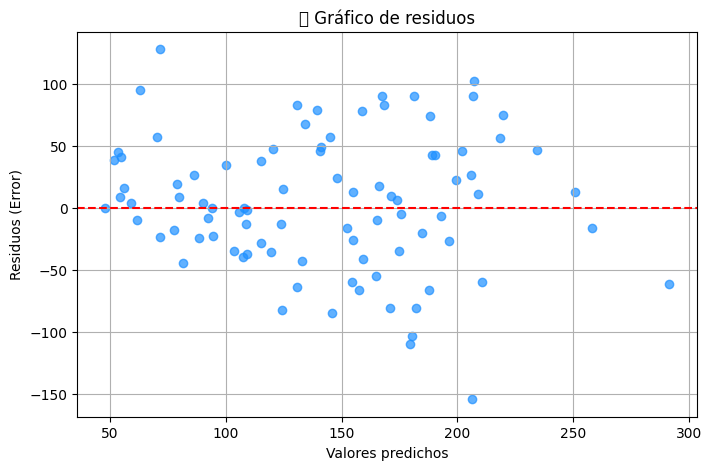

C:\Users\Gabriel\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


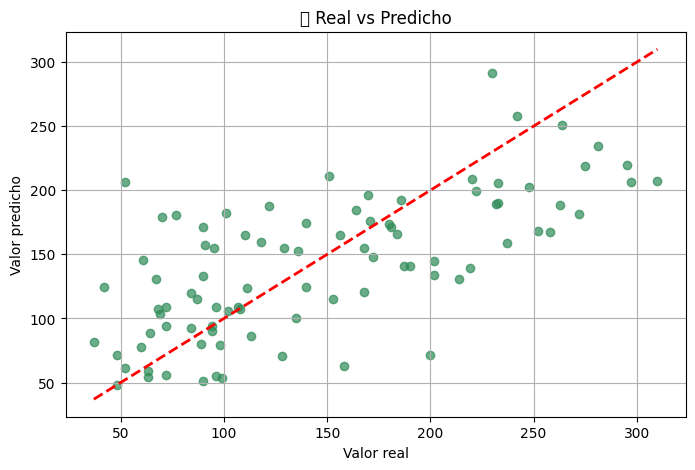

C:\Users\Gabriel\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


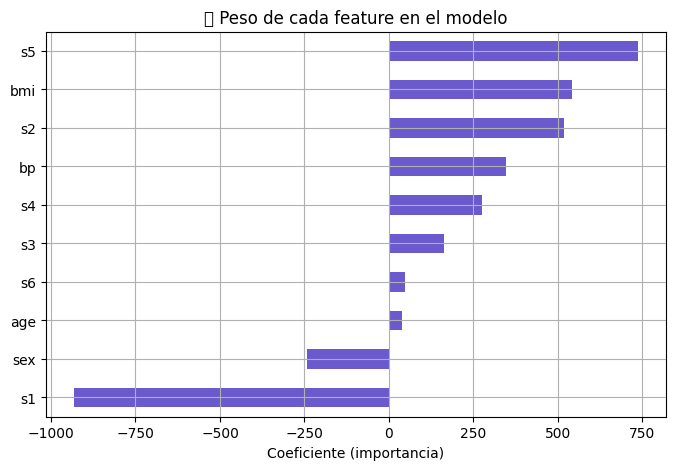

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Cargar datos
data = load_diabetes()
X = data.data
y = data.target
feature_names = data.feature_names
print("📊 Datos cargados:", y)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Métricas del modelo:")
print(f"✔️ MSE  = {mse:.2f}")
print(f"✔️ RMSE = {rmse:.2f}")
print(f"✔️ MAE  = {mae:.2f}")
print(f"✔️ R²   = {r2:.4f}")

# -----------------------
# 1. Gráfico de residuos
# -----------------------
residuos = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuos, alpha=0.7, color='dodgerblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores predichos")
plt.ylabel("Residuos (Error)")
plt.title("📉 Gráfico de residuos")
plt.grid(True)
plt.show()

# ---------------------------------------
# 2. Gráfico real vs predicho (perfecta = línea 45°)
# ---------------------------------------
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='seagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.title("📈 Real vs Predicho")
plt.grid(True)
plt.show()

# ---------------------------------------
# 3. Importancia de los features
# ---------------------------------------
import pandas as pd

coef_importance = pd.Series(model.coef_, index=feature_names)
coef_importance = coef_importance.sort_values()

plt.figure(figsize=(8, 5))
coef_importance.plot(kind="barh", color="slateblue")
plt.title("📊 Peso de cada feature en el modelo")
plt.xlabel("Coeficiente (importancia)")
plt.grid(True)
plt.show()
